<a href="https://colab.research.google.com/github/coryroyce/code_assignments/blob/main/211127_Clustering_Techniques/Hierarchical_Clustering_Cory_Randolph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering
Cory Randolph

11/27/2021

Goal: Demonstrate Hierarchical Clustering



# Load Packages

Import basic packages for visualization

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import sklearn
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering Overview

Hierarchical clustering is a bottoms-up approach that puts individual data points into clauser and then merges them together based on a distance metric/rule. This process continues until the data has been clustered into a single cluster and can then be pruned back to the desired number of clusters.

# Create Data

Use a sklearn package to create clusters of data. Let's choose 5 clusters for our example.

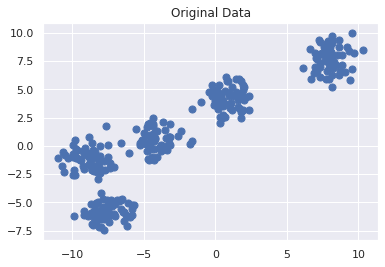

In [2]:
from sklearn.datasets import make_blobs

# Create cluster values in 2 dimensions
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.9, random_state=3)

# Plot the clusters
plt.title('Original Data')
plt.scatter(X[:, 0], X[:, 1], s=50);

# Hierarchical Clustering

## Draw Dendrogram

First view the total clustering for all points as a dendrogram.

In [3]:
import scipy.cluster.hierarchy as sch

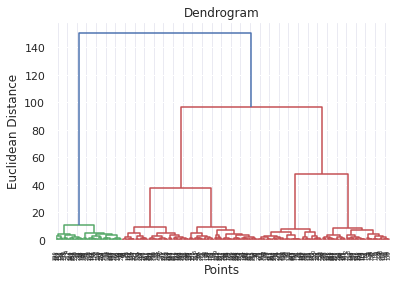

In [4]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')
plt.show()

Note: Based on this dendrogram when the Euclidean Distance is about 15, the five major clusters have been formed and then there is a large jump to further cluster them. So K = 5 makes sense for our data even if we didn't know it ahead of time.

## Hierarchical Clustering - Single

Apply Hierarchical Clustering

In [5]:
hierarchical_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'single')
y_hc = hierarchical_clustering.fit_predict(X)

Plot the data with clusters colored for reference.

Text(0.5, 1.0, 'Hierarchical Clusters')

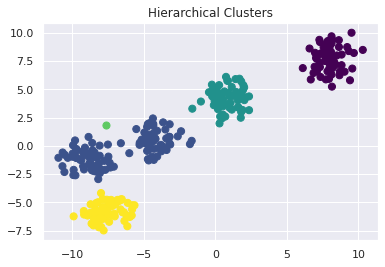

In [6]:
# Define the scatter plot and format
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

# Add Title
plt.title('Hierarchical Clusters')

Note: With single-link there is a cluster of just one point and two other clusters were combined. For this example this is not a good result.

## Hierarchical Clustering - Average

Apply Hierarchical Clustering

In [7]:
hierarchical_clustering = sklearn.cluster.AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'average')
y_hc = hierarchical_clustering.fit_predict(X)

Plot the data with clusters colored for reference.

Text(0.5, 1.0, 'Hierarchical Clusters')

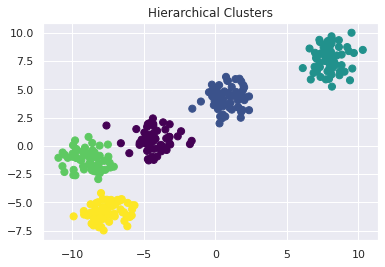

In [8]:
# Define the scatter plot and format
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

# Add Title
plt.title('Hierarchical Clusters')

Note: With Average link the results look pretty similar to the ward clusters and intuitively look correct.

## Hierarchical Clustering - Ward

Apply Hierarchical Clustering

In [9]:
hierarchical_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hierarchical_clustering.fit_predict(X)

Plot the data with clusters colored for reference.

Text(0.5, 1.0, 'Hierarchical Clusters')

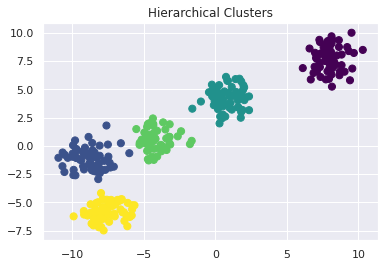

In [10]:
# Define the scatter plot and format
plt.scatter(X[:, 0], X[:, 1], c=y_hc, s=50, cmap='viridis')

# Add Title
plt.title('Hierarchical Clusters')

Note: These results look good an seem to have correctly identified the clusters.

# Clustering Metrics

Apply clustering metrics to get a sense of how good the clustering algorithm is working.

## Silhouette Score

The silhouette Score can be used to measure the distance between clusters and does not necessarily need to know the true labels, but by comparing the score of the ground truth to the algorithms clusters/predictions we get a good understanding.

Silhouette score for actual labels

In [11]:
silhouette_score_actual = sklearn.metrics.silhouette_score(X = X, labels = y_true, metric='euclidean', sample_size=None, random_state=3)

silhouette_score_actual

0.6971581815434948

Silhouette score for algorithms predictions

In [12]:
silhouette_score_pred = sklearn.metrics.silhouette_score(X = X, labels = y_hc, metric='euclidean', sample_size=None, random_state=3)

silhouette_score_pred

0.6940137799680601

Calculate the ratio of the Silhouette score for the predicted over the actual. (The closer to 1 the better)

In [13]:
silhouette_score_ratio = silhouette_score_pred/ silhouette_score_actual

silhouette_score_ratio

0.995489687048536

Note: The score of near 1 implies that almost all points were classified correctly, ~1 point was miss labeled in this case.

## Adjusted Mutual Information

Adjusted Mutual Information score measures the information between clusters. And "adjusted" means that 1 is a perfect score.

In [14]:
sklearn.metrics.adjusted_mutual_info_score(labels_true = y_true, labels_pred = y_hc)

0.9814548707003045

Note: A Score of 98% is still really good, but just underperforms K-means with a perfect 100% on this dataset.

## Accuracy and Overall Classification

Classification report provide summary statistics about the correct labels

Map the clusters to correct labels to fist the classification report.

In [15]:
# def get_label_mapping(y_true, y_pred):
#   temp_list = []

#   for pair in zip(y_pred, y_true):
#     if pair in temp_list:
#       continue
#     else:
#       temp_list.append(pair)

#   dict_label_mapping = dict(temp_list)

#   return dict_label_mapping

In [16]:
# Manually figure out what labels need to be remapped to
label_dict = {0:2, 1:4, 2:0, 3:1, 4:3}

# Convert the predicted values by mapping each label from the dictionary defined above
y_hc_mapped = np.vectorize(label_dict.get)(y_hc)

print(sklearn.metrics.classification_report(y_true = y_true, y_pred = y_hc_mapped))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      0.97      0.98        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       0.97      1.00      0.98        60

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



Accuracy is how many clusters are correctly predicted and is a good initial rating, but doesn't get into the intricacies of clustering.

In [17]:
sklearn.metrics.accuracy_score(y_true = y_true, y_pred = y_hc_mapped)

0.9933333333333333

Since Hierarchical Clustering doesn't learn the lables we had to manualy remap them, but then the classification report works well and we see that we have an accuracy of 99.3%.

# Reference

Reference notebook provide template for how to calculate the Hierarchical Clusters [Notebook](https://colab.research.google.com/github/saskeli/data-analysis-with-python-summer-2019/blob/master/clustering.ipynb#scrollTo=tcxe_UMzHMih)

Performance metrics on clustering [Performance Metrics in Machine Learning ](https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-d69550662dc6)